# Data Extraction

### Installing BeautifulSoup

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re
import time



### Inspection

In [ ]:
import time
import re
flat = [] 
rent = []
area = []
furnishing = []
locality = []
city=[]
township=[]
bathroom=[]
facing=[]
pagenum = []
# go throught the 23 pages
total_time = time.time()
for i in range(1,24): 
    start_time = time.time()
    URL='https://www.makaan.com/pune-residential-property/rent-property-in-pune-city'.format(i)
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)

    for x in soup.find_all('div', attrs={'class':'infoWrap'}):
        pname = x.find('a', attrs = {'class':'typelink'})
        cost = x.find('div', attrs = {'data-type':'price-link'})
        fur = x.find('td', attrs = {'class':'val'})
        ar= x.find('td',attrs={'class':'size'})
        loc = x.find('span', attrs = {'itemprop':'addressLocality'})
        cit = x.find('span',attrs={'class':'cityName'})
        town= x.find('a',attrs={'class':'projName'})
        bath=x.find('li',attrs={'title':'bathrooms'})
        fac=x.find('li',attr={'title':'facing'})
        if pname is None:
            flat.append(np.NaN)
        else:
            flat.append((pname.text)[0:5])
            
        if town is None:
            township.append(np.NaN)
        else:
            township.append(town.text)        

        if fac is None:
            facing.append(np.NaN)
        else:
            facing.append(fac.text)
            
        if cost is None:
            rent.append(np.NaN)
        else:
            rent.append(cost.text)
            
        if fur is None:
            furnishing.append(np.NaN)
        else:
            furnishing.append(fur.text)

        if ar is None:
            area.append(np.NaN)
        else:
            area.append(ar.text)

        if bath is None:
            bathroom.append(np.NaN)
        else:
            bathroom.append(bath.text)
            
        if loc is None:
            locality.append(np.NaN)
        else:
            locality.append(loc.text)
            
        if cit is None:
            city.append(np.NaN)
        else:
            city.append(cit.text)
            
        pagenum.append(i)
    print('Page {} completed in {} seconds'.format(i, time.time()-start_time))
print("Total Time Completed in seconds"+str(time.time()-total_time))

### Creating DataFrame

In [3]:
df = pd.DataFrame({'PageNo': pagenum,'Township':township,'Locality':locality, 'City':city,'Rent':rent, 'Apartment':flat,'Furnishing': furnishing,'Area':area,'Bathroom':bathroom,'Facing':facing})
df

,PageNo,Township,Locality,City,Rent,Apartment,Furnishing,Area,Bathroom,Facing
0,1,NaN,Bhosari,Pune,"5,000",1 RK,Unfurnished,500,1 bathrooms,NaN
1,1,NaN,Mundhwa,Pune,"15,000",1 BHK,Unfurnished,850,1 bathrooms,NaN
2,1,NaN,Kharadi,Pune,"5,000",1 BHK,Furnished,800,3 bathrooms,NaN
3,1,NaN,Hinjawadi Village,Pune,"7,500",2 BHK,Furnished,1200,2 bathrooms,NaN
4,1,NaN,Lohegaon,Pune,"7,000",1 BHK,Unfurnished,450,1 bathrooms,NaN
...,...,...,...,...,...,...,...,...,...,...
455,23,NaN,Bhegade Aali,Pune,"12,000",2 BHK,Semi-Furnished,1000,1 bathrooms,NaN
456,23,NaN,Chakan,Pune,"5,000",1 BHK,Semi-Furnished,627,2 bathrooms,NaN
457,23,NaN,Bhukum,Pune,"15,000",2 BHK,Semi-Furnished,735,NaN,NaN
458,23,NaN,Kharadi,Pune,"38,000",3 BHK,Furnished,1500,3 bathrooms,NaN


In [4]:
p=df.sort_values(by=['Rent'],ascending=True)
p_1BHK=p[p['Apartment']=='1 BHK']
p_2BHK=p[p['Apartment']=='2 BHK']
p_2BHK

,PageNo,Township,Locality,City,Rent,Apartment,Furnishing,Area,Bathroom,Facing
428,22,Arena Chandraprakash 2,Katraj,Pune,"10,000",2 BHK,Unfurnished,550,1 bathrooms,NaN
288,15,Arena Chandraprakash 2,Katraj,Pune,"10,000",2 BHK,Unfurnished,550,1 bathrooms,NaN
228,12,Arena Chandraprakash 2,Katraj,Pune,"10,000",2 BHK,Unfurnished,550,1 bathrooms,NaN
48,3,Arena Chandraprakash 2,Katraj,Pune,"10,000",2 BHK,Unfurnished,550,1 bathrooms,NaN
108,6,Arena Chandraprakash 2,Katraj,Pune,"10,000",2 BHK,Unfurnished,550,1 bathrooms,NaN
...,...,...,...,...,...,...,...,...,...,...
403,21,NaN,Hinjawadi Village,Pune,"7,500",2 BHK,Furnished,1200,2 bathrooms,NaN
183,10,NaN,Hinjawadi Village,Pune,"7,500",2 BHK,Furnished,1200,2 bathrooms,NaN
83,5,NaN,Hinjawadi Village,Pune,"7,500",2 BHK,Furnished,1200,2 bathrooms,NaN
323,17,NaN,Hinjawadi Village,Pune,"7,500",2 BHK,Furnished,1200,2 bathrooms,NaN


# Analysis & Visualization (Plotting the data)

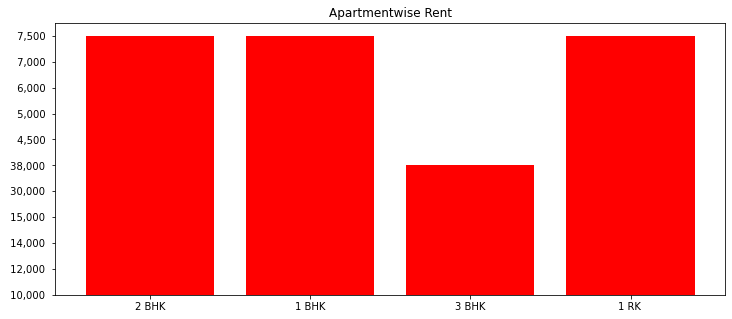

In [13]:
plt.figure(figsize=(12,5))
plt.bar(height='Rent',x='Apartment',color='r',data=p)
plt.title('Apartmentwise Rent')
plt.show()

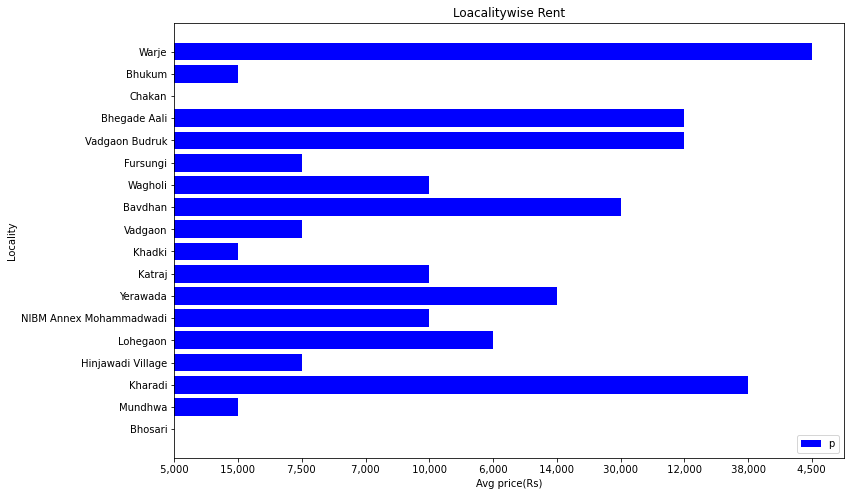

In [15]:
plt.figure(figsize=(12,8))
plt.barh(y='Locality',width='Rent',color='blue',data=df)
plt.xlabel('Avg price(Rs)')
plt.ylabel('Locality')
plt.legend('price',loc='lower right')
plt.title('Loacalitywise Rent')
plt.show()

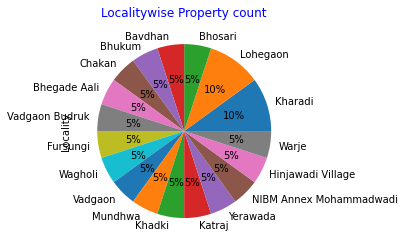

In [18]:
df["Locality"].value_counts().plot.pie(autopct="%.0f%%")
plt.title('Localitywise Property count',color='b')
plt.show()

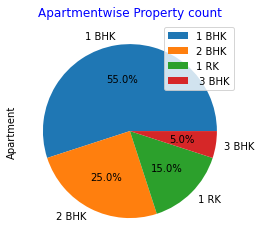

In [31]:
df["Apartment"].value_counts().plot.pie(autopct="%.1f%%")
plt.title('Apartmentwise Property count',color='b')
plt.legend(['1 BHK','2 BHK','1 RK',' 3 BHK'])
plt.show()

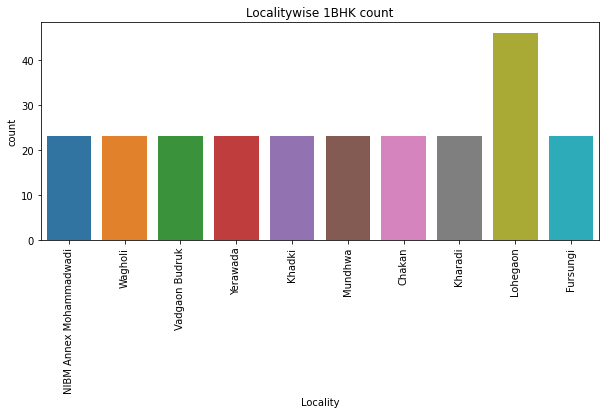

In [20]:
plt.figure(figsize=(10,4))
sns.countplot(x='Locality',data=p_1BHK)
plt.title("Localitywise 1BHK count")
plt.xticks(rotation=90)
plt.show()

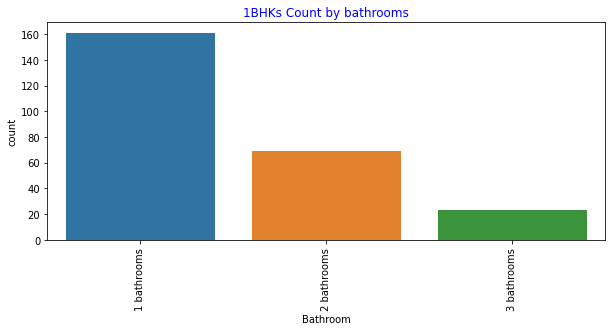

In [34]:
plt.figure(figsize=(10,4))
sns.countplot(x='Bathroom',data=p_1BHK)
plt.title("1BHKs Count by bathrooms",color='b')
plt.xticks(rotation=90)
plt.show()